In [2]:
import matplotlib.pyplot as plt

## Task 1
Using sympy, write your own function that takes a mathematical function y = $x^2 - x + 21$ as input and returns the derivative: $2𝑥−1$

In [3]:
import sympy
from sympy import *

x = Symbol('x')
func = x**2 - x + 21
diff(func)

2*x - 1

## Task 2
Write your own function that takes a mathematical function y = $ (x-y)^2 $ and the variable for which you want to calculate the partial derivative. The function should return the partial derivative of this variable: $2𝑥-2𝑦$.

In [4]:
x, y = symbols('x y')
func = (x - y)**2
diff(func, x)

2*x - 2*y

## Task 3

1. Write a mathematical function. Imagine you have y_true and you have y_pred. You need to calculate the square of the deviation of one from the other. And the predicted value is obtained using a linear regression function: y = wx +b. Additionally, divide all this by n.
2. Write a Python function that takes as input function from (1). The function should return the partial derivatives of w and b.

In [8]:
#1
x, y, y_true, w, b, n = symbols('x y y_true w b n')

y_pred = w*x + b
func = ((y_true - y_pred) ** 2) / n

#2
def partial_deriv(f, w, b):
    return [diff(f, w), diff(f, b)]

#3
partial_deriv(func, w, b)

[-2*x*(-b - w*x + y_true)/n, (2*b + 2*w*x - 2*y_true)/n]

## Task 4
1. Write a class `Gradient()` which will consist of several methods. The object receives two vectors during initialization: `X`, `Y`. Then the methods will access them inside the class.
    - `predict`: it receives `w`, `b` as input, it outputs the predicted values `Y_pred`;
    - `mse`: it inputs `Y_pred`, outputs the calculated MSE;
    - `update`: on input it receives `Y_pred`, `w`, `b`; on output it gives new values `w`, `b` which have been updated due to the calculated gradients.
2. Check the methods by feeding two vectors `X`, `Y` and initial parameters `w`, `b` to the required methods at the input of the class.

In [14]:
import numpy as np
X = np.array(
    [32.50234527, 53.42680403, 61.53035803, 47.47563963, 59.81320787, 55.14218841, 
     52.21179669, 39.29956669, 48.10504169, 52.55001444, 45.41973014, 54.35163488, 
     44.1640495 , 58.16847072, 56.72720806, 48.95588857, 44.68719623, 60.29732685, 
     45.61864377, 38.81681754]
)
Y = np.array(
    [31.70700585, 68.77759598, 62.5623823 , 71.54663223, 87.23092513, 78.21151827, 
     79.64197305, 59.17148932, 75.3312423 , 71.30087989, 55.16567715, 82.47884676, 
     62.00892325, 75.39287043, 81.43619216, 60.72360244, 82.89250373, 97.37989686, 
     48.84715332, 56.87721319]
)

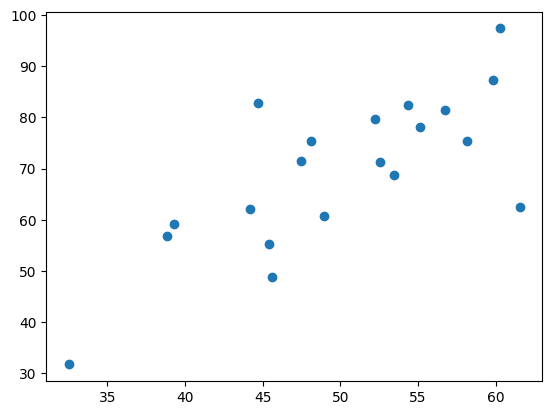

In [15]:
plt.scatter(X, Y);

In [32]:
import numpy as np
from sklearn import metrics

step = 0.0002
n = 20

class Gradient:
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        
    def predict(self, w, b):  
        Y_pred = w * self.X + b
        return Y_pred
    
    def mse(self, Y_pred):
        return metrics.mean_squared_error(self.Y, Y_pred)

    def update(self, Y_pred, w, b):
        w_temp = np.array([w * self.X + b])
        part_w = -2 * np.dot(self.Y - Y_pred, self.X) / n
        
        part_b = -2 * (self.Y - Y_pred).sum() / n
        
        w_new = w - step * part_w
        b_new = b - step * part_b
        
        return [w_new, b_new]
        
test = Gradient(X, Y)
predict_y = test.predict(0.5, 4)
test.mse(predict_y)

1784.8517253411974

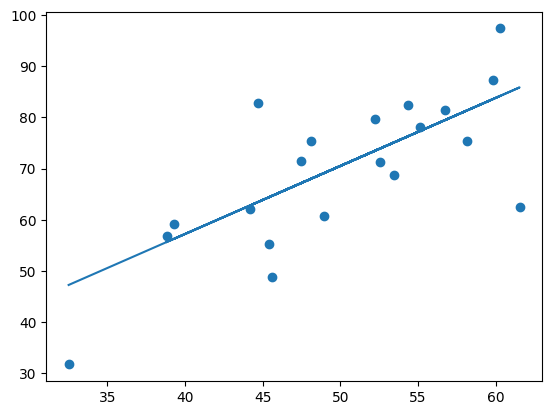

In [33]:
new = test.update(predict_y, 0.5, 4)
plt.scatter(X, Y)
plt.plot(X, X * new[0] + new[1])

## Task 5
Improve the code so that the `optimize` method appears. It should iteratively go through some number of times updating values `w`, `b`, coming to the optimal value. Stopping criteria:
 - If the number of predefined iterations `num_iterations` has been exceeded;
 - if the new iteration produced a difference between the current error and the error of the previous iteration of a value smaller than `stopping_threshold`;
 - the method should return the final values of `w`, `b`, and `mse`.

In [159]:
num_iterations = 2000
stopping_threshold = 0.001
learning_rate = 0.0001

class GradientDescent(Gradient):
    
    def __init__(self, X, Y):
        self.X = X
        self.Y = Y
        
    def optimize(self, w, b):
        err_old = self.mse(self.predict(w, b))
        
        for i in range(1, num_iterations):
            part_w = -2 * np.dot(self.Y - w * self.X - b, self.X) / n
            part_b = -2 * (self.Y - w * self.X - b).sum() / n
            
            w = w - learning_rate * part_w
            b = b - learning_rate * part_b
            
            err_new = self.mse(self.predict(w, b))
            
            if err_old - err_new < stopping_threshold:
                break
            
            err_old = err_new
        
        mse = self.mse(self.predict(w, b))
        return w, b, mse
        
test1 = GradientDescent(X, Y)
predict_y = test1.predict(0.5, 4)
test1.optimize(0.5, 4)

(1.3115991091004235, 4.015587792053563, 99.29751520268579)